<a href="https://colab.research.google.com/github/nug1209/data-analysis/blob/main/20250621_migrants.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

data_url = "https://github.com/nug1209/datasets/raw/refs/heads/main/SYB67_327_202411_International%20Migrants%20and%20Refugees.csv"

In [ ]:
df = pd.read_csv(data_url, skiprows=1)
df.head ()

,Region/Country/Area,Unnamed: 1,Year,Series,Value,Footnotes,Source
0,1,"Total, all countries or areas",2005,International migrant stock: Both sexes (number),"191,446,828",NaN,"United Nations Population Division, New York, ..."
1,1,"Total, all countries or areas",2005,International migrant stock: Both sexes (% tot...,2.9,NaN,"United Nations Population Division, New York, ..."
2,1,"Total, all countries or areas",2005,International migrant stock: Male (% total Pop...,3.0,NaN,"United Nations Population Division, New York, ..."
3,1,"Total, all countries or areas",2005,International migrant stock: Female (% total P...,2.9,NaN,"United Nations Population Division, New York, ..."
4,1,"Total, all countries or areas",2010,International migrant stock: Both sexes (number),"220,983,187",NaN,"United Nations Population Division, New York, ..."


In [ ]:
# prompt: please cIean the data So that the columns now are just second to fourth Columns

df_cleaned = df.iloc[:, 1:5]
df_cleaned.head()

,Unnamed: 1,Year,Series,Value
0,"Total, all countries or areas",2005,International migrant stock: Both sexes (number),"191,446,828"
1,"Total, all countries or areas",2005,International migrant stock: Both sexes (% tot...,2.9
2,"Total, all countries or areas",2005,International migrant stock: Male (% total Pop...,3.0
3,"Total, all countries or areas",2005,International migrant stock: Female (% total P...,2.9
4,"Total, all countries or areas",2010,International migrant stock: Both sexes (number),"220,983,187"


In [ ]:
# prompt: rename the first Column to Area. Delete commas from the last column

# Rename the first column (which is now the second column in df_cleaned) to Area
df_cleaned = df_cleaned.rename(columns={df_cleaned.columns[0]: 'Area'})

# Assuming the last column in df_cleaned is the one with commas
# Convert the column to string type first to use the .str accessor
df_cleaned[df_cleaned.columns[-1]] = df_cleaned[df_cleaned.columns[-1]].astype(str).str.replace(',', '', regex=False)

df_cleaned.head()

,Area,Year,Series,Value
0,"Total, all countries or areas",2005,International migrant stock: Both sexes (number),191446828
1,"Total, all countries or areas",2005,International migrant stock: Both sexes (% tot...,2.9
2,"Total, all countries or areas",2005,International migrant stock: Male (% total Pop...,3.0
3,"Total, all countries or areas",2005,International migrant stock: Female (% total P...,2.9
4,"Total, all countries or areas",2010,International migrant stock: Both sexes (number),220983187


In [ ]:
df_cleaned.sample(20)

,Area,Year,Series,Value
5668,Saint Lucia,2023,"Asylum seekers, including pending cases (number)",0
5479,Republic of Moldova,2015,Other of concern to UNHCR (number),6233
5847,Serbia,2020,Other of concern to UNHCR (number),221053
523,Micronesia,2010,International migrant stock: Male (% total Pop...,22.6
4009,Liberia,2020,International migrant stock: Both sexes (number),87947
4402,Mauritius,2015,International migrant stock: Both sexes (% tot...,2.3
7143,Yemen,2015,International migrant stock: Both sexes (% tot...,1.4
5868,Seychelles,2020,International migrant stock: Both sexes (% tot...,13.3
5377,Puerto Rico,2010,International migrant stock: Male (% total Pop...,8.3
4249,Malaysia,2023,Total refugees and people in refugee-like situ...,133821


In [ ]:
# prompt: list unique values in year and series columns

print("Unique values in 'Year':", df_cleaned['Year'].unique())
print("Unique values in 'Series':", df_cleaned['Series'].unique())

Unique values in 'Year': [2005 2010 2015 2020 2023 2022 2019 2017 2021 2016 2018]
Unique values in 'Series': ['International migrant stock: Both sexes (number)'
 'International migrant stock: Both sexes (% total population)'
 'International migrant stock: Male (% total Population)'
 'International migrant stock: Female (% total Population)'
 'Total refugees and people in refugee-like situations (number)'
 'Asylum seekers, including pending cases (number)'
 'Other of concern to UNHCR (number)'
 'Total population of concern to UNHCR (number)']


In [ ]:
# prompt: create line chart for interrational migrant stock both sexes over the years for total all countries or areas. please write right series and area names

import pandas as pd
import altair as alt

# Filter the data for the specific series and area
df_plot = df_cleaned[
    (df_cleaned['Series'] == 'International migrant stock: Both sexes (number)') &
    (df_cleaned['Area'] == 'Total, all countries or areas')].copy() # Create a copy to avoid SettingWithCopyWarning

# Ensure the last column is numeric after removing commas
df_plot[df_plot.columns[-1]] = pd.to_numeric(df_plot[df_plot.columns[-1]], errors='coerce')

# Drop rows where the value could not be converted to numeric
df_plot.dropna(subset=[df_plot.columns[-1]], inplace=True)


chart = alt.Chart(df_plot).mark_line().encode(
    x=alt.X('Year:O'), # Treat Year as ordinal to ensure all years are shown
    y=alt.Y(df_plot.columns[-1], title='International Migrant Stock (Both Sexes)'), # Use the actual column name dynamically
    tooltip=['Year', df_plot.columns[-1]]
).properties(
    title='International Migrant Stock: Both Sexes (Total all countries or areas) Over Time'
).interactive() # Make the chart interactive for zooming and panning

chart


alt.Chart(...)

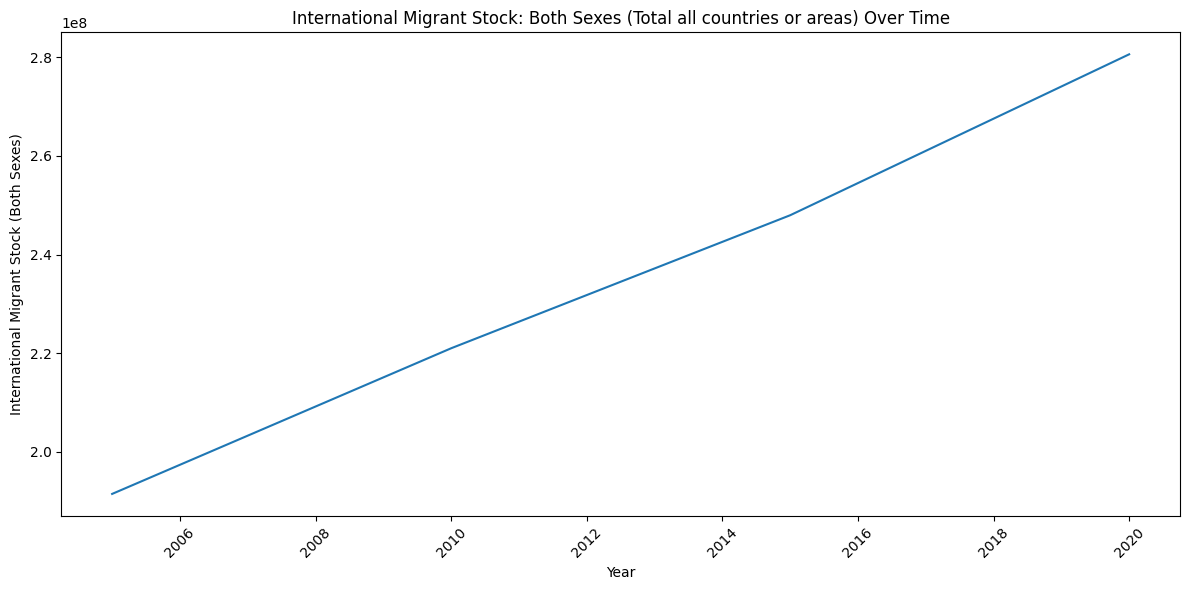

In [ ]:
# prompt: repeat above but use Seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure the last column is numeric after removing commas
df_plot[df_plot.columns[-1]] = pd.to_numeric(df_plot[df_plot.columns[-1]], errors='coerce')

# Drop rows where the value could not be converted to numeric
df_plot.dropna(subset=[df_plot.columns[-1]], inplace=True)

# Use Seaborn to create the line plot
plt.figure(figsize=(12, 6)) # Optional: Adjust figure size
sns.lineplot(data=df_plot, x='Year', y=df_plot.columns[-1])
plt.title('International Migrant Stock: Both Sexes (Total all countries or areas) Over Time')
plt.xlabel('Year')
plt.ylabel('International Migrant Stock (Both Sexes)')
plt.xticks(rotation=45) # Optional: Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

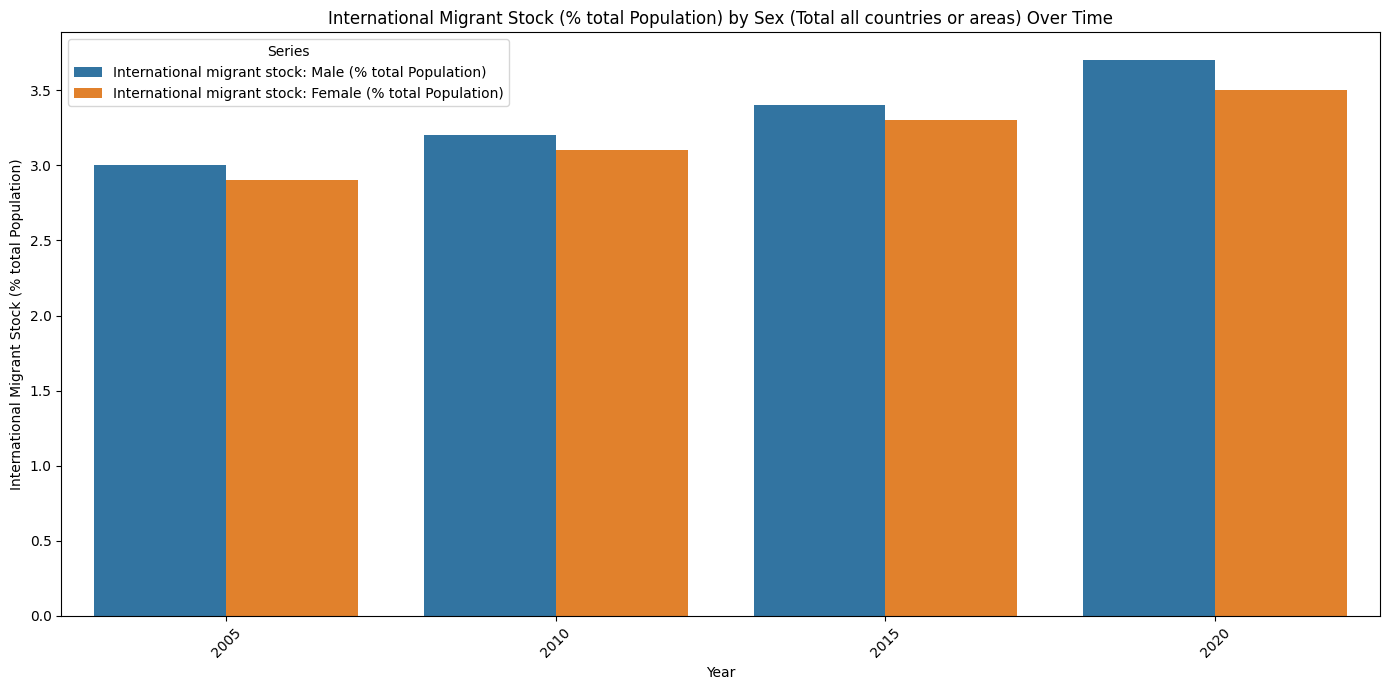

In [ ]:
# prompt: create clustered barchart of International migrant stock: Male (% total Population) and International migrant stock: Female (% total Population) in Total, all countries or areas over the years. use Sea born

import pandas as pd
import matplotlib.pyplot as plt
# Filter the data for the specific series and area
df_bar = df_cleaned[
    ((df_cleaned['Series'] == 'International migrant stock: Male (% total Population)') |
     (df_cleaned['Series'] == 'International migrant stock: Female (% total Population)')) &
    (df_cleaned['Area'] == 'Total, all countries or areas')
].copy() # Create a copy to avoid SettingWithCopyWarning

# Ensure the value column is numeric
df_bar[df_bar.columns[-1]] = pd.to_numeric(df_bar[df_bar.columns[-1]], errors='coerce')

# Drop rows where the value could not be converted to numeric
df_bar.dropna(subset=[df_bar.columns[-1]], inplace=True)

# Use Seaborn to create the clustered bar plot
plt.figure(figsize=(14, 7)) # Optional: Adjust figure size
sns.barplot(data=df_bar, x='Year', y=df_bar.columns[-1], hue='Series')
plt.title('International Migrant Stock (% total Population) by Sex (Total all countries or areas) Over Time')
plt.xlabel('Year')
plt.ylabel('International Migrant Stock (% total Population)')
plt.xticks(rotation=45) # Optional: Rotate x-axis labels for better readability
plt.legend(title='Series')
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()